In [61]:
import  tensorflow.keras.applications as kerasapp
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
model = ResNet50(weights='imagenet')

2022-11-15 13:25:35.098749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:58:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-15 13:25:35.175952: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-15 13:25:35.175996: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-15 13:25:35.177130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [45]:
img_path = 'v2/bhc/edge_pm/data/island2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [46]:
preds = model.predict(x)

1/1 [==============================] - 0s 112ms/step


In [47]:
print('Prediction : ', decode_predictions(preds, top=5)[0])

Prediction :  [('n09246464', 'cliff', 0.6049693), ('n09399592', 'promontory', 0.16878514), ('n09193705', 'alp', 0.08371159), ('n09468604', 'valley', 0.021693189), ('n02980441', 'castle', 0.011216546)]


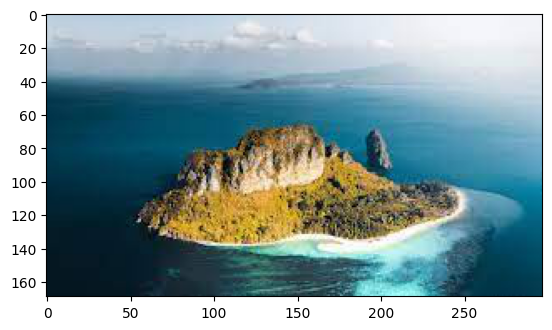

In [52]:
data = plt.imread(img_path)
plt.imshow(data)

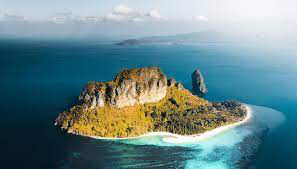

In [55]:
image = Image.open(img_path)
image

In [65]:
model_type = str(input('insert your model : '))
if model_type == 'Xception':
    model = kerasapp.ResNet50(weights='imagenet')
elif model_type == 'VGG16':
    model = kerasapp.VGG16(weights='imagenet')
elif model_type == 'VGG19':
    model = kerasapp.VGG19(weights='imagenet')
elif model_type == 'ResNet50':
    model = kerasapp.ResNet50(weights='imagenet')
elif model_type == 'ResNet50V2':
    model = kerasapp.ResNet50V2(weights='imagenet')
elif model_type == 'ResNet52':
    model = kerasapp.ResNet52(weights='imagenet')
elif model_type == 'ResNet52V2':
    model = kerasapp.ResNet52V2(weights='imagenet')
elif model_type == 'ResNet101':
    model = kerasapp.ResNet101(weights='imagenet')
elif model_type == 'ResNet101V2':
    model = kerasapp.ResNet101V2(weights='imagenet')
elif model_type == 'ResNet152':
    model = kerasapp.ResNet152(weights='imagenet')
elif model_type == 'ResNet152V2':
    model = kerasapp.ResNet152V2(weights='imagenet')
elif model_type == 'InceptionV3':
    model = kerasapp.InceptionV3(weights='imagenet')
elif model_type == 'InceptionResNetV2':
    model = kerasapp.InceptionResNetV2(weights='imagenet')
elif model_type == 'MobileNet':
    model = kerasapp.MobileNet(weights='imagenet')
elif model_type == 'MobileNetV2':
    model = kerasapp.MobileNetV2(weights='imagenet')
elif model_type == 'DenseNet121':
    model = kerasapp.DenseNet121(weights='imagenet')
elif model_type == 'DenseNet169':
    model = kerasapp.DenseNet169(weights='imagenet')
elif model_type == 'DenseNet201':
    model = kerasapp.DenseNet201(weights='imagenet')
elif model_type == 'NASNetMobile':
    model = kerasapp.NASNetMobile(weights='imagenet')
elif model_type == 'NASNetLarge':
    model = kerasapp.NASNetLarge(weights='imagenet')
elif model_type == 'EfficientNetB0':
    model = kerasapp.EfficientNetB0(weights='imagenet')
elif model_type == 'EfficientNetB1':
    model = kerasapp.EfficientNetB1(weights='imagenet')
elif model_type == 'EfficientNetB2':
    model = kerasapp.EfficientNetB2(weights='imagenet')
elif model_type == 'EfficientNetB3':
    model = kerasapp.EfficientNetB3(weights='imagenet')
elif model_type == 'EfficientNetB4':
    model = kerasapp.EfficientNetB4(weights='imagenet')
elif model_type == 'EfficientNetB5':
    model = kerasapp.EfficientNetB5(weights='imagenet')
elif model_type == 'EfficientNetB6':
    model = kerasapp.EfficientNetB6(weights='imagenet')
elif model_type == 'EfficientNetB7':
    model = kerasapp.EfficientNetB7(weights='imagenet')
elif model_type == 'EfficientNetV2B0':
    model = kerasapp.EfficientNetV2B0(weights='imagenet')
elif model_type == 'EfficientNetV2B1':
    model = kerasapp.EfficientNetV2B1(weights='imagenet')
elif model_type == 'EfficientNetV2B2':
    model = kerasapp.EfficientNetV2B2(weights='imagenet')
elif model_type == 'EfficientNetV2B3':
    model = kerasapp.EfficientNetV2B3(weights='imagenet')
elif model_type == 'EfficientNetV2S':
    model = kerasapp.EfficientNetV2S(weights='imagenet')
elif model_type == 'EfficientNetV2BM':
    model = kerasapp.ResNet101(weights='imagenet')
elif model_type == 'EfficientNetV2BL':
    model = kerasapp.EfficientNetV2BL(weights='imagenet')
elif model_type == 'ConvNeXtTiny':
    model = kerasapp.ConvNeXtTiny(weights='imagenet')
elif model_type == 'ConvNeXtSmall':
    model = kerasapp.ConvNeXtSmall(weights='imagenet')
elif model_type == 'ConvNeXtBase':
    model = kerasapp.ConvNeXtBase(weights='imagenet')
elif model_type == 'ConvNeXtLarge':
    model = kerasapp.ConvNeXtLarge(weights='imagenet')
elif model_type == 'ConvNeXtXLarge':
    model = kerasapp.ConvNeXtXLarge(weights='imagenet')

preds = model.predict(x)
print('Prediction : ', decode_predictions(preds, top=5)[0])

355031056/355031056 [==============================] - 14s 0us/step


2022-11-15 17:01:11.768391: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x558617c57180 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-11-15 17:01:11.768966: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2022-11-15 17:01:11.963038: I tensorflow/compiler/jit/xla_compilation_cache.cc:476] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 7s 7s/step
Prediction :  [('n09428293', 'seashore', 6.8034663), ('n09399592', 'promontory', 6.243682), ('n01943899', 'conch', 5.74822), ('n01944390', 'snail', 5.4785385), ('n09332890', 'lakeside', 5.356497)]


In [67]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'v2/bhc/edge_pm/data/island2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 0s 245ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 7, 7, 512)